<a href="https://colab.research.google.com/github/zhangyingchengqi/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter02/Auto_gradient_of_tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 第二章 第三节  张量的自动梯度运算

In [16]:
import numpy as np
import torch
x = torch.tensor([[2., -1.], [1., 1.]], requires_grad=True) #   requires_grad=True指定为张量对象计算梯度
print(x)

tensor([[ 2., -1.],
        [ 1.,  1.]], requires_grad=True)


In [17]:
out = x.pow(2).sum() #计算所有输入的平方和,  这个函数的梯度就是 2x
out

tensor(7., grad_fn=<SumBackward0>)

In [18]:
out.backward() # 对输出的每个值调用backward()来计算 该值的梯度。 即对于输入的x的一个小变化，输出y的变化.

In [19]:
x.grad  # 现在可以得到out关于x的梯度了
# 参数的梯度值越大，说明这个参数对输出的影响越强，优化时就会被调整得更多。
#如果梯度为 0（梯度消失），参数几乎无法被更新

tensor([[ 4., -2.],
        [ 2.,  2.]])

### Computing gradients for the same case that was present in `Chain_rule.ipynb` notebook in previous chapter 案例:将前面的链式法则用张量实现一次

In [22]:
x = np.array([[1,1]])
y = np.array([[0]])
x, y = [torch.tensor(i).float() for i in [x,y]] #将numpy数组转换为张量
print( x, y )

tensor([[1., 1.]]) tensor([[0.]])


In [25]:
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T,
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T,
    np.array([-0.5516], dtype=np.float32)
]

W = [torch.tensor(i, requires_grad=True) for i in W] #将输入的权重转换为张量
print( W )

[tensor([[-0.0053, -0.5820, -0.2723],
        [ 0.3793, -0.5204,  0.1896]], requires_grad=True), tensor([-0.0140,  0.5607, -0.0628], requires_grad=True), tensor([[ 0.1528],
        [-0.1745],
        [-0.1135]], requires_grad=True), tensor([-0.5516], requires_grad=True)]


In [27]:
# 前向传播 用张量实现
def feed_forward(inputs, outputs, weights):
    pre_hidden = torch.matmul( inputs,  weights[0])+ weights[1]
    hidden = 1/(1+torch.exp(-pre_hidden))
    out = torch.matmul(hidden, weights[2]) + weights[3]
    mean_squared_error = torch.mean(torch.square(out - outputs))
    return mean_squared_error

In [28]:
loss = feed_forward(x, y, W)
loss

tensor(0.3346, grad_fn=<MeanBackward0>)

Loss对这个参数的偏导数 $\frac{\partial \text{Loss}}{\partial w}$

梯度与偏导数的异同点:

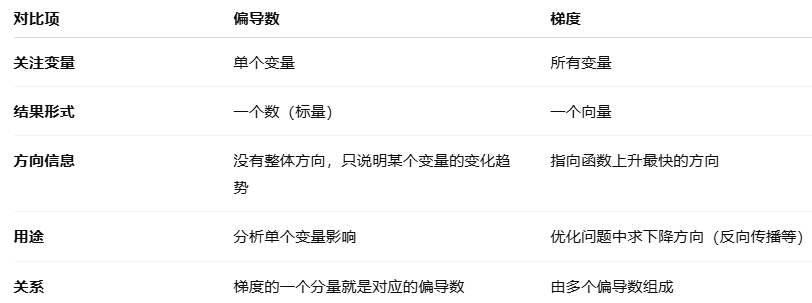

In [29]:
loss.backward()

In [34]:
print([ w.grad for w in W])  # 每个参数关于loss的梯度, 数值越大，说明这个参数 在当前状态下 对 Loss 的影响越大
# 正的梯度：增大这个参数会让 Loss 增大
# 负的梯度：增大这个参数会让 Loss 减小

[tensor([[-0.0428,  0.0469,  0.0327],
        [-0.0428,  0.0469,  0.0327]]), tensor([-0.0428,  0.0469,  0.0327]), tensor([[-0.6814],
        [-0.4255],
        [-0.5364]]), tensor([-1.1568])]


In [37]:
updated_W = [w-w.grad for w in W] #更新权重 : 注意: 1. 正的梯度：增大这个参数会让 Loss 增大 2. 负的梯度：增大这个参数会让 Loss 减小
updated_W

[tensor([[ 0.0375, -0.6289, -0.3050],
         [ 0.4221, -0.5673,  0.1569]], grad_fn=<SubBackward0>),
 tensor([ 0.0288,  0.5138, -0.0955], grad_fn=<SubBackward0>),
 tensor([[0.8342],
         [0.2510],
         [0.4229]], grad_fn=<SubBackward0>),
 tensor([0.6052], grad_fn=<SubBackward0>)]